# Learning pandas

This section is about learning how to work with `pandas` by using it
without much guidance. You will play with the
[dataset](https://www.gov.scot/publications/scottish-index-of-multiple-deprivation-2020v2-ranks/)
of the [Scottish Index of Multiple
Deprivation](https://www.gov.scot/collections/scottish-index-of-multiple-deprivation-2020/#lookupfiles)
(SIMD). Specifically, you will load a table containing the rank of each
data zone according to the overall SIMD and according to its subdomains
(check the links above if you would like to learn more).

## Data Preparation

Before you start playing with the data, you need to figure out how to
read the data. It is not a CSV file this time, but XLSX. `pandas` is
capable of reading Excel files like this one. Instead of the `read_csv`
you used before, you just need to use `read_excel` this time.

Take a second to download the
[dataset](https://www.gov.scot/publications/scottish-index-of-multiple-deprivation-2020v2-ranks/)
and check its structure in Excel before moving forward.

You have probably figured out that there are two sheets in this file,
and you need to read the second one, called `"SIMD 2020v2 ranks"`.

Let’s start by importing `pandas`.

In [1]:
import pandas as pd

Since you have the file in your Downloads folder now, you can read it
from there. Or you can read it directly from `gov.scot`.

In [2]:
url = "https://www.gov.scot/binaries/content/documents/govscot/publications/statistics/2020/01/scottish-index-of-multiple-deprivation-2020-ranks-and-domain-ranks/documents/scottish-index-of-multiple-deprivation-2020-ranks-and-domain-ranks/scottish-index-of-multiple-deprivation-2020-ranks-and-domain-ranks/govscot%3Adocument/SIMD%2B2020v2%2B-%2Branks.xlsx"

To read the proper sheet, you need to specify `sheet_name` to
`read_excel`. `pandas` will download the file for you and open it as a
`DataFrame`.

In [3]:
df_simd = pd.read_excel(url, sheet_name="SIMD 2020v2 ranks")

> **Reading a local file**
>
> If you want to read the file from your downloads folder, you will need
> to pass its location. That can look like this if you are on macOS:
>
> ``` py
> simd = pd.read_excel(
>     "/Users/martin/Downloads/SIMD+2020v2+-+ranks.xlsx",
>     sheet_name="SIMD 2020v2 ranks",
> )
> ```
>
> Or like this if you are on Windows. Note the `r` in front of the
> string, ensuring that the backlashes (`\`), common in Windows file
> paths, are properly interpreted. Or you can replace them with `/`:
>
> ``` py
> simd = pd.read_excel(
>     r"C:\Users\martin\Downloads\SIMD+2020v2+-+ranks.xlsx",
>     sheet_name="SIMD 2020v2 ranks",
> )
> ```
>
> Alternatively, you can read the file from the `data` folder attached
> to this lecture.
>
> ``` py
> simd = pd.read_excel(
>     "https://martinfleischmann.net/sds/data_wrangling/data/SIMD+2020v2+-+ranks.xlsx",
>     sheet_name="SIMD 2020v2 ranks",
> )
> ```

And you should be good to go!

In [4]:
df_simd.head(10)

,Data_Zone,Intermediate_Zone,Council_area,Total_population,Working_age_population,SIMD2020v2_Rank,SIMD2020v2_Income_Domain_Rank,SIMD2020_Employment_Domain_Rank,SIMD2020_Health_Domain_Rank,SIMD2020_Education_Domain_Rank,SIMD2020_Access_Domain_Rank,SIMD2020_Crime_Domain_Rank,SIMD2020_Housing_Domain_Rank
0,S01006506,Culter,Aberdeen City,894,580,4691,3936.0,3220.0,5174,5887,4724,4664.0,3248.0
1,S01006507,Culter,Aberdeen City,793,470,4862,4829.0,4481.0,5051,4384,2148,4602.0,3486.0
2,S01006508,Culter,Aberdeen City,624,461,5686,4460.0,5110.0,5942,5915,4200,4563.5,5342.0
3,S01006509,Culter,Aberdeen City,537,307,4332,3481.0,3229.0,3871,6401,3982,5626.0,4394.5
4,S01006510,Culter,Aberdeen City,663,415,3913,3344.0,3448.0,3049,4092,5588,3885.0,3736.0
5,S01006511,Culter,Aberdeen City,759,453,6253,5469.0,5346.0,5783,5410,4974,6928.0,5924.0
6,S01006512,Culter,Aberdeen City,539,345,5692,6264.0,6206.0,6586,6506,547,4528.0,4815.0
7,S01006513,"Cults, Bieldside and Milltimber West",Aberdeen City,788,406,6177,6572.0,5695.0,5516,6531,1490,6928.0,6394.0
8,S01006514,"Cults, Bieldside and Milltimber West",Aberdeen City,1123,709,6715,6704.0,6658.0,6733,6847,1858,5507.0,6868.0
9,S01006515,"Cults, Bieldside and Milltimber West",Aberdeen City,816,529,6363,6955.0,6803.0,6846,6838,659,6844.0,6174.5


## Learn about Scotland

In the previous chapter, you learned the basics of `pandas`. Now is the
time to use this knowledge and learn something about Scotland. The SIMD
rankings are similar in structure to Chicago Influenza rates you have
seen before, but not too much. Each row is allocated to a single area,
but the table does not follow the “tidy” principles.

Try answering the following questions about the dataset:

-   Which data zone is the most deprived (lowest ranking?) Which council
    area is it?
-   Can you add a column with a proportion of the working age population
    in each data zone?
-   Which council area is, on average, the least deprived based on the
    Income domain?
-   What is the total population of the “Glasgow City” council?
-   Can you plot the ranking distribution in “Glasgow City”? How does it
    compare to the “City of Edinburgh”?
-   Can you figure out how to create a scatter plot of a relationship
    between the education and health domain rankings?
-   What else can you derive from the data?

### Lowest ranking
Which data zone is the most deprived (lowest ranking?) Which council area is it?


In [11]:
# sort data frame by column
df_simd_sorted = df_simd.sort_values(by="SIMD2020v2_Rank", ascending=True)
df_simd_sorted_first = df_simd_sorted.iloc[0]
print(f'Data zone with lowest ranking is data zone: {df_simd_sorted_first.Data_Zone}, council area: {df_simd_sorted_first.Council_area}')



Data zone with lowest ranking is data zone: S01010891, council area: Inverclyde


### Proportion of population in working age
Can you add a column with a proportion of the working age population in each data zone?
The proportion of the population in working age is the ratio of the population aged 15-64 to total population per each data zone.

In [19]:
df_simd["working_prop"] =  df_simd["Working_age_population"]/df_simd["Total_population"]
df_simd_f = df_simd[["Data_Zone", "working_prop", "Council_area", "Total_population", "SIMD2020v2_Rank"]]
df_simd_f.head(10)



,Data_Zone,working_prop,Council_area,Total_population,SIMD2020v2_Rank
0,S01006506,0.648770,Aberdeen City,894,4691
1,S01006507,0.592686,Aberdeen City,793,4862
2,S01006508,0.738782,Aberdeen City,624,5686
3,S01006509,0.571695,Aberdeen City,537,4332
4,S01006510,0.625943,Aberdeen City,663,3913
5,S01006511,0.596838,Aberdeen City,759,6253
6,S01006512,0.640074,Aberdeen City,539,5692
7,S01006513,0.515228,Aberdeen City,788,6177
8,S01006514,0.631345,Aberdeen City,1123,6715
9,S01006515,0.648284,Aberdeen City,816,6363


### Agregation by council area
 Which council area is, on average, the least deprived based on the Income domain?



In [40]:
ser_simd_aggregate = df_simd.groupby('Council_area')['SIMD2020v2_Income_Domain_Rank'].mean()

ser_simd_aggregate_sorted = ser_simd_aggregate.sort_values()
least_dep_ca = ser_simd_aggregate_sorted.index[0]
least_dep_value = ser_simd_aggregate_sorted.iloc[0]
print(f'The least deprived council area based on the income domain is: {least_dep_ca} with mean income domain of: {round(least_dep_value, 2)}')



The least deprived council area based on the income domain is: Glasgow City with mean income domain of: 2210.41


### Total population of selected council
What is the total population of the “Glasgow City” council?


In [41]:
ser_glasgow_simd = df_simd.loc[df_simd['Council_area'] == 'Glasgow City']
glasgow_population_sum = ser_glasgow_simd['Total_population'].sum()
print(f'Total population of the Glasgow City council is: {glasgow_population_sum}')



Total population of the Glasgow City council is: 621020


### Plot creation
Can you plot the ranking distribution in “Glasgow City”? How does it compare to the “City of Edinburgh”?


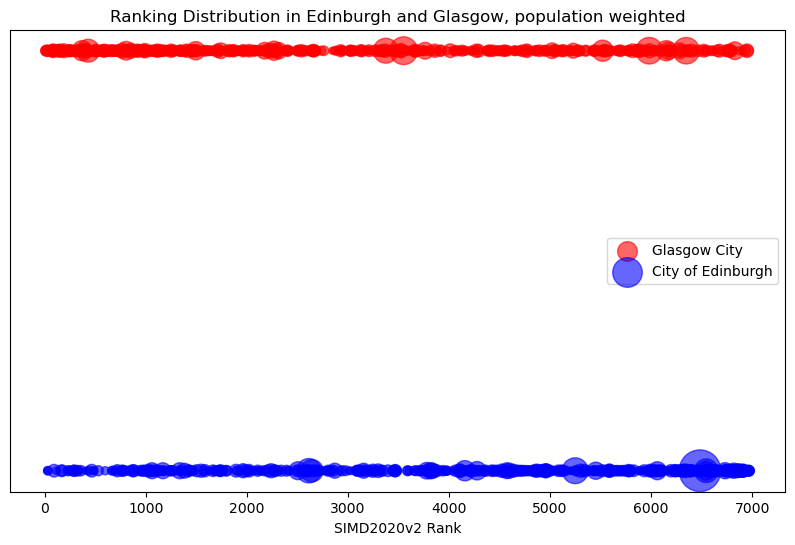

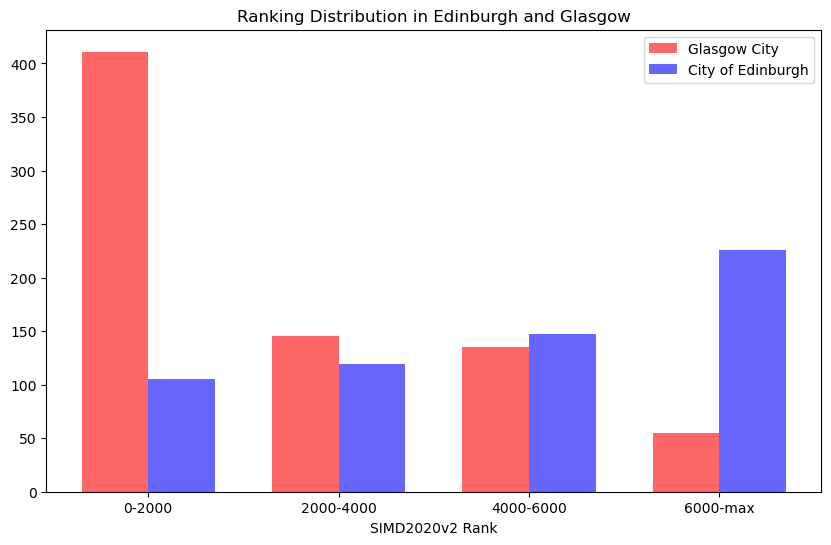

In [64]:
# Filter data for Glasgow City and City of Edinburgh
# glasgow_data = df_simd[df_simd['Council_area'] == 'Glasgow City']['SIMD2020v2_Rank']
# edinburgh_data = df_simd[df_simd['Council_area'] == 'City of Edinburgh']['SIMD2020v2_Rank']

# # Plotting the distributions
# glasgow_data.plot(kind='hist', bins=30, alpha=0.5, label='Glasgow City', color='blue')
# edinburgh_data.plot(kind='hist', bins=30, alpha=0.5, label='City of Edinburgh', color='red')

import matplotlib.pyplot as plt
# Use population to set dot size in scatter, multiple opts tested
df_simd['Size'] = ((df_simd['Total_population'] - df_simd['Total_population'].min()) / (df_simd['Total_population'].max() - df_simd['Total_population'].min())) * (30 - 0.5) + 0.5

# Filter data for selected cities
glasgow_data = df_simd[df_simd['Council_area'] == 'Glasgow City']
edinburgh_data = df_simd[df_simd['Council_area'] == 'City of Edinburgh']


# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(glasgow_data['SIMD2020v2_Rank'], [10] * len(glasgow_data), s=glasgow_data['Size']**2, alpha=0.6, color='red', label='Glasgow City')
plt.scatter(edinburgh_data['SIMD2020v2_Rank'], [0] * len(edinburgh_data), s=edinburgh_data['Size']**2, alpha=0.6, color='blue', label='City of Edinburgh')

plt.xlabel('SIMD2020v2 Rank')
plt.title('Ranking Distribution in Edinburgh and Glasgow, population weighted')
plt.yticks([])
plt.legend()


# Create bar chart
bins = [0, 2000, 4000, 6000, df_simd['SIMD2020v2_Rank'].max()]
labels = ['0-2000', '2000-4000', '4000-6000', '6000-max']

df_simd.loc[df_simd['Council_area'] == 'Glasgow City', 'Bins'] = pd.cut(df_simd[df_simd['Council_area'] == 'Glasgow City']['SIMD2020v2_Rank'], bins=bins, labels=labels)
df_simd.loc[df_simd['Council_area'] == 'City of Edinburgh', 'Bins'] = pd.cut(df_simd[df_simd['Council_area'] == 'City of Edinburgh']['SIMD2020v2_Rank'], bins=bins, labels=labels)

# Get counts for each bin
glasgow_counts = df_simd[df_simd['Council_area'] == 'Glasgow City']['Bins'].value_counts().sort_index()
edinburgh_counts = df_simd[df_simd['Council_area'] == 'City of Edinburgh']['Bins'].value_counts().sort_index()

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35
x = range(len(glasgow_counts))

ax.bar([p - width/2 for p in x], glasgow_counts.values, width, label='Glasgow City', color='red', alpha=0.6)
ax.bar([p + width/2 for p in x], edinburgh_counts.values, width, label='City of Edinburgh', color='blue', alpha=0.6)

ax.set_xlabel('SIMD2020v2 Rank')
ax.set_title('Ranking Distribution in Edinburgh and Glasgow')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()


### Scatter plot 
Can you figure out how to create a scatter plot of a relationshin between the education and health domain rankings?

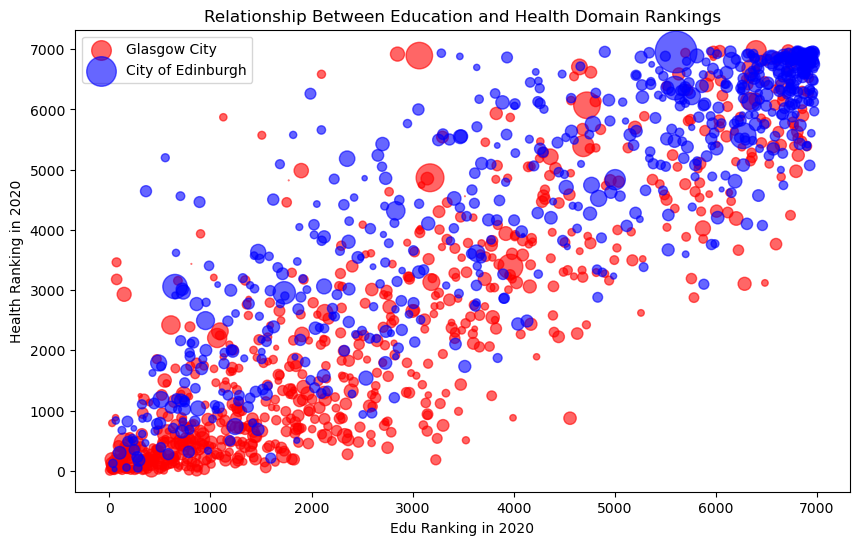

In [66]:
glasgow_data = df_simd[df_simd['Council_area'] == 'Glasgow City']
edinburgh_data = df_simd[df_simd['Council_area'] == 'City of Edinburgh']

plt.figure(figsize=(10, 6))
plt.scatter(glasgow_data['SIMD2020_Education_Domain_Rank'], glasgow_data['SIMD2020_Health_Domain_Rank'], s=glasgow_data['Size']**2, alpha=0.6, color='red', label='Glasgow City')
plt.scatter(edinburgh_data['SIMD2020_Education_Domain_Rank'], edinburgh_data['SIMD2020_Health_Domain_Rank'], s=edinburgh_data['Size']**2, alpha=0.6, color='blue', label='City of Edinburgh')

plt.xlabel('Edu Ranking in 2020')
plt.ylabel('Health Ranking in 2020')
plt.title('Relationship Between Education and Health Domain Rankings')
plt.legend()
